In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector as selector



In [4]:
# Load the data
signdata = pd.read_csv('/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/signdata.csv', encoding='latin-1')

# Make a copy of the data
processed_data = signdata.copy()

# Preprocessing for numerical features
numerical_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Drop specific columns
columns_to_drop = [
    'UlnarRotationM4.2.0', 'FlexionChangeM5.2.0', 'SpreadChangeM5.2.0',
    'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0',
    'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0',
    'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0',
    'FlexionChangeM6.2.0', 'SpreadChangeM6.2.0', 'SignTypeM6.2.0',
    'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0',
    'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0',
    'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0'
]
processed_data.drop(columns=columns_to_drop, inplace=True)

# Verify that remaining columns have names
if any(processed_data.columns.isnull()):
    # Explicitly assign column names if necessary
    processed_data.columns = [f'Column_{i}' for i in range(len(processed_data.columns))]

# Separate numerical and categorical columns
numerical_cols = processed_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = processed_data.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical features
imputer = SimpleImputer(strategy='median')
processed_data[numerical_cols] = scaler.fit_transform(imputer.fit_transform(processed_data[numerical_cols]))

# Handle missing values for categorical columns
for col in categorical_cols:
    processed_data[col].fillna(processed_data[col].mode()[0], inplace=True)

# Label encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    processed_data[col] = label_encoder.fit_transform(processed_data[col])

# Verify if processed_data contains column names for all columns
contains_column_names = all(isinstance(col, str) for col in processed_data.columns)

if contains_column_names:
    print("processed_data contains column names for all columns.")
else:
    print("processed_data does not contain column names for all columns.")

processed_data contains column names for all columns.


In [5]:
# Define the file path for the new CSV file
new_csv_path = '/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/processed_data.csv'

# Save the processed_data DataFrame to a new CSV file
processed_data.to_csv(new_csv_path, index=False)

# Print a message to confirm that the data has been saved
print(f"The processed data has been saved to '{new_csv_path}'.")

The processed data has been saved to '/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/processed_data.csv'.


In [8]:
# Importing necessary libraries
import numpy as np

# Calculate Pearson correlation coefficients
correlation_matrix = processed_data.drop(columns=['GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'SignBankEnglishTranslations']).corrwith(processed_data['SignBankEnglishTranslations'])

# Sort correlation coefficients in descending order
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Print the top correlated features
print("Top correlated features with 'SignBankEnglishTranslations':")
print(sorted_correlations.head())

Top correlated features with 'SignBankEnglishTranslations':
SignBankLemmaID         0.384059
EntryID                 0.283692
LemmaID                 0.282393
SignBankAnnotationID    0.202292
Batch                   0.113896
dtype: float64


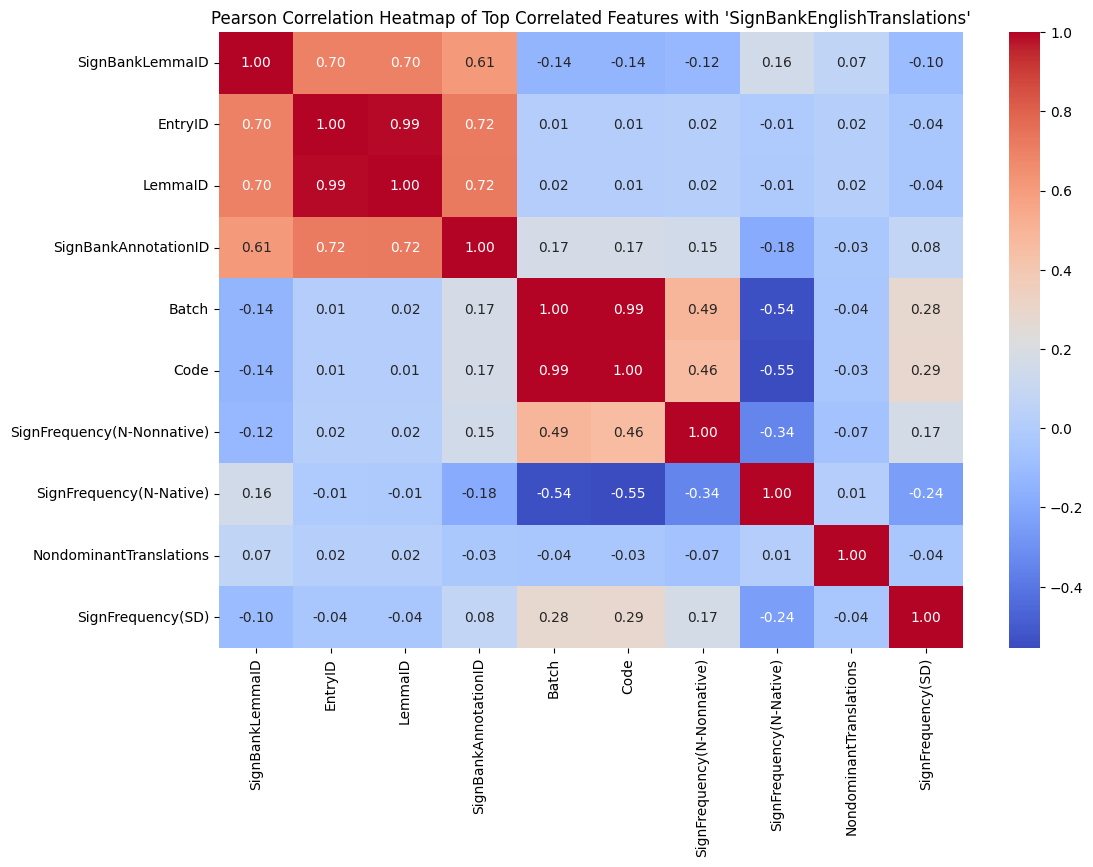

In [9]:
# Plot correlation heatmap if desired
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(processed_data[sorted_correlations.head(10).index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap of Top Correlated Features with 'SignBankEnglishTranslations'")
plt.show()

In [10]:
# Calculate the average correlation coefficient
average_correlation = sorted_correlations.mean()

# Print the average correlation coefficient
print("Average correlation coefficient:", average_correlation)

Average correlation coefficient: 0.03416604217858101


In [11]:
# Calculate quartiles of correlation coefficients
correlation_quartiles = sorted_correlations.describe(percentiles=[0.25, 0.5, 0.75])

# Print the quartiles
print("Correlation coefficient quartiles:")
print(correlation_quartiles)

Correlation coefficient quartiles:
count    148.000000
mean       0.034166
std        0.049615
min        0.000146
25%        0.007808
50%        0.021699
75%        0.040615
max        0.384059
dtype: float64


In [12]:
# Define the threshold based on the 75th percentile
threshold = correlation_quartiles.loc['75%']

# Filter out features with correlation coefficients above the threshold
strongly_correlated_features = sorted_correlations[sorted_correlations > threshold]

# Print the strongly correlated features
print("Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):")
print(strongly_correlated_features)

Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):
SignBankLemmaID                 0.384059
EntryID                         0.283692
LemmaID                         0.282393
SignBankAnnotationID            0.202292
Batch                           0.113896
Code                            0.113160
SignFrequency(N-Nonnative)      0.105201
SignFrequency(N-Native)         0.079614
NondominantTranslations         0.078538
SignFrequency(SD)               0.075122
ClipDuration(ms)                0.074219
SignDuration(ms)                0.073719
DominantTranslation             0.072156
SignOffset(ms)                  0.071017
FlexionChange.2.0Frequency      0.066380
Initialized.2.0                 0.063888
CDISemanticCategory             0.062302
SignBankReferenceID             0.061129
SignFrequency(SD-Native)        0.059383
InCDI                           0.058569
Iconicity(SD)                   0.056441
Handshape.2.0                   0.056322
FlexionCh

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


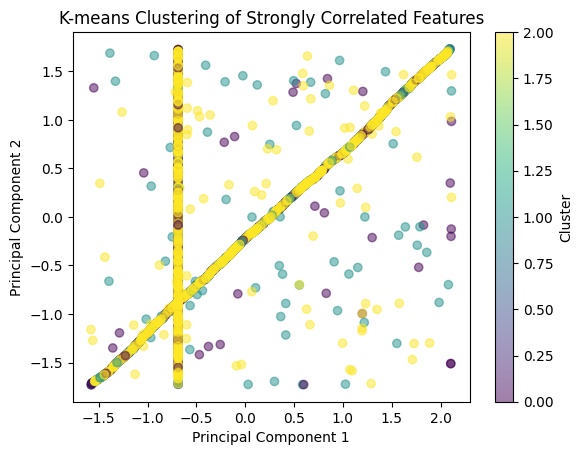

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
X = processed_data[strongly_correlated_features.index]

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means Clustering
# Define the number of clusters
n_clusters = 3  # You can adjust this number based on your data and requirements
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the Clusters
# Visualize the clusters using the first two principal components (for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Strongly Correlated Features')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
print(strongly_correlated_features.shape)

(37,)


In [18]:
y = processed_data['SignBankEnglishTranslations']

In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the RFE selector with the RandomForestClassifier and desired number of features
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=20, step=1)

# Fit the RFE selector on the strongly correlated features
rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print the selected features
print("Selected features after RFE:")
print(selected_features)

Selected features after RFE:
Index(['SignBankLemmaID', 'EntryID', 'LemmaID', 'SignBankAnnotationID', 'Code',
       'SignFrequency(SD)', 'ClipDuration(ms)', 'SignDuration(ms)',
       'SignOffset(ms)', 'SignBankReferenceID', 'SignFrequency(SD-Native)',
       'Iconicity(SD)', 'Handshape.2.0', 'SignFrequency(M-Native)',
       'EnglishWF(lg10)', 'SignFreq(Z-Nonnative)', 'SignFrequency(Z)',
       'SignFrequency(M)', 'SignFreq(Z-native)',
       'SignFrequency(SD-Nonnative)'],
      dtype='object')


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Assuming 'SignBankEnglishTranslations' is a continuous variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Absolute Error:", mae)

2024-02-23 13:41:39.228544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
55/55 [==============================] - 2s 8ms/step - loss: 379264.0625 - mae: 495.2555 - val_loss: 232854.2031 - val_mae: 380.1437
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 281115.5938 - mae: 423.5817 - val_loss: 219232.4375 - val_mae: 366.9028
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 270247.9375 - mae: 416.9644 - val_loss: 224751.2969 - val_mae: 363.0543
Epoch 4/50
55/55 [==============================] - 0s 6ms/step - loss: 256637.1562 - mae: 398.0380 - val_loss: 209449.6406 - val_mae: 354.9935
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 256960.6406 - mae: 403.0766 - val_loss: 206757.7656 - val_mae: 348.2607
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 245005.9219 - mae: 391.0436 - val_loss: 208956.9375 - val_mae: 347.9438
Epoch 7/50
55/55 [==============================] - 0s 4ms/step - loss: 244723.9844 - mae: 389.9151 - val_loss: 206193.9688 - val_mae: 3

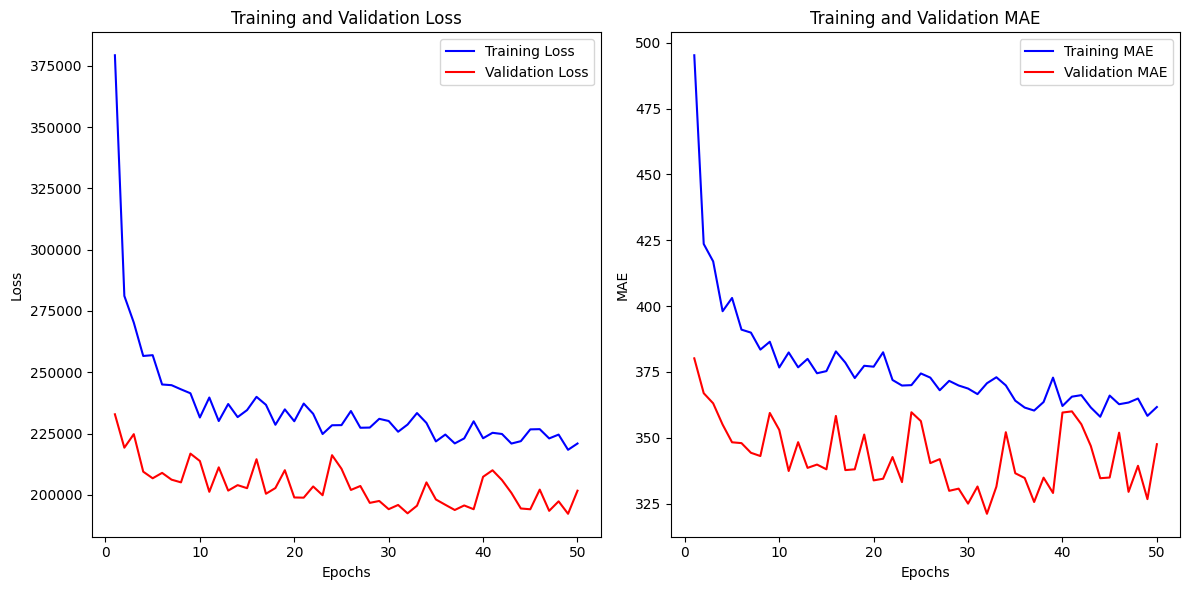

In [24]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'b-', label='Training MAE')
plt.plot(epochs, validation_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear')  # Assuming 'SignBankEnglishTranslations' is a continuous variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Absolute Error:", mae)

Epoch 1/50
55/55 [==============================] - 4s 11ms/step - loss: 918209.5625 - mae: 845.3292 - val_loss: 918433.7500 - val_mae: 850.1995
Epoch 2/50
55/55 [==============================] - 0s 8ms/step - loss: 916344.0625 - mae: 844.7919 - val_loss: 916314.6875 - val_mae: 849.8315
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 914063.5625 - mae: 844.0193 - val_loss: 916653.3750 - val_mae: 850.9123
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 910931.1875 - mae: 842.8376 - val_loss: 918336.1250 - val_mae: 852.5642
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 906988.0625 - mae: 841.2297 - val_loss: 916812.5625 - val_mae: 852.1990
Epoch 6/50
55/55 [==============================] - 0s 5ms/step - loss: 901974.0000 - mae: 839.2871 - val_loss: 912634.0000 - val_mae: 849.6453
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 897008.6250 - mae: 836.9811 - val_loss: 909746.1875 - val_mae: 

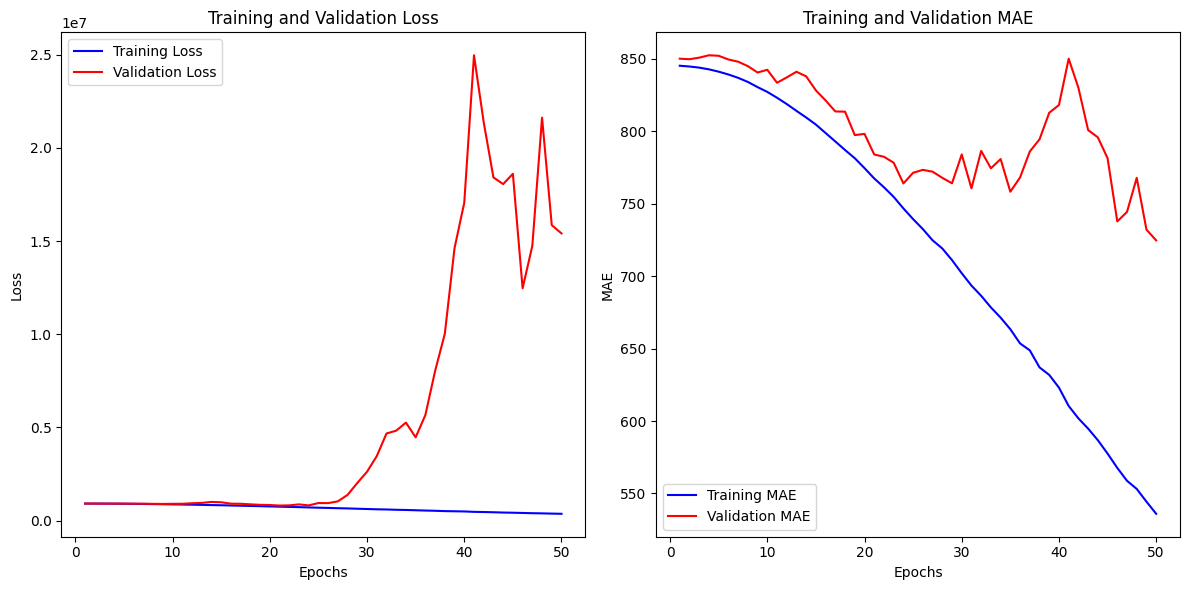

In [26]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'b-', label='Training MAE')
plt.plot(epochs, validation_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scikeras.wrappers import KerasRegressor

# Define the function to create the neural network model
def create_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1, activation='linear')
    ])
    
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])
    return model

# Create KerasRegressor for GridSearchCV
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


ValueError: Invalid parameter learning_rate for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(learning_rate=0.001)`
Check the list of available parameters with `estimator.get_params().keys()`

In [33]:
estimator.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])